In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book (2).csv


In [78]:
book = pd.read_csv('book.csv',encoding='latin1')

In [80]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


## EXPLORATORY DATA ANALYSIS

In [81]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [82]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [83]:
book.shape

(10000, 4)

In [84]:
book.dtypes

Unnamed: 0      int64
User.ID         int64
Book.Title     object
Book.Rating     int64
dtype: object

In [85]:
book.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [86]:
book.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [87]:
book = book.drop('Unnamed: 0',axis=1)

In [88]:
book.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [89]:
book1 = book.rename({'User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'},axis=1)

In [90]:
book1.head()

,User_ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [91]:
book1.shape

(10000, 3)

## VISUALIZATION

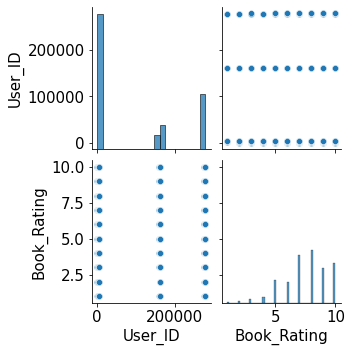

In [92]:
import seaborn as sns
sns.pairplot(book1)

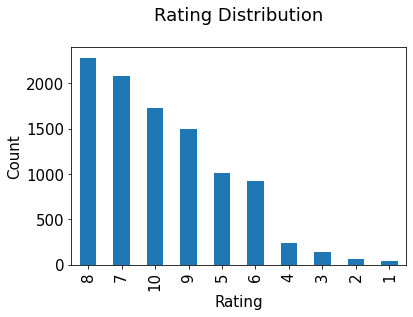

In [93]:
plt.rc("font", size=15)
book1.Book_Rating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

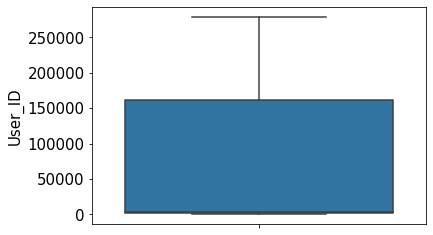

In [94]:
sns.boxplot(y="User_ID",  data=book1);

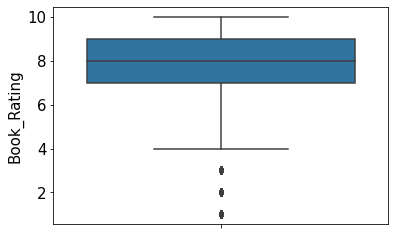

In [95]:
sns.boxplot(y="Book_Rating",  data=book1)

(array([  43.,   63.,  146.,  237., 1007.,  920., 2076., 2283., 1493.,
        1732.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

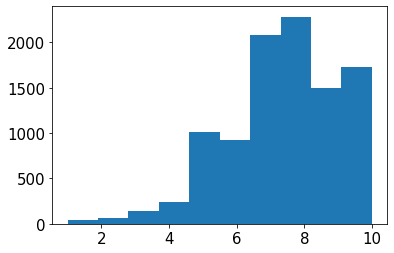

In [96]:
plt.hist(book1['Book_Rating'])

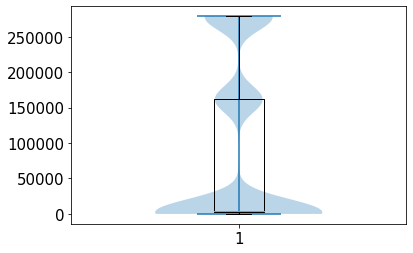

In [97]:
plt.violinplot(book1["User_ID"])
box=plt.boxplot(book1['User_ID'])
plt.show()

In [98]:
book1.corr()

,User_ID,Book_Rating
User_ID,1.000000,-0.041523
Book_Rating,-0.041523,1.000000


In [99]:
book1['Book_Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

In [100]:
book_sorted_ranking=book1.sort_values('Book_Rating',ascending=True)
book_sorted_ranking[['User_ID', 'Book_Title', 'Book_Rating']].head(20)


,User_ID,Book_Title,Book_Rating
4337,1733,Welcome to the Funny Farm: The All-True Misadv...,1
4540,1903,Mrs. Mike,1
640,277363,Children of the Night,1
6144,2985,Groom For Maggie (Whirlwind Weddings) (Silhoue...,1
4523,1903,Selected Poems,1
4231,1674,Cars and Trucks and Things That Go,1
1717,278202,Catechism of the Catholic Church,1
8143,4164,Ugly American,1
8588,161068,THIS SIDE OF PARADISE (A Scribner Classic),1
1442,278024,Saucer,1


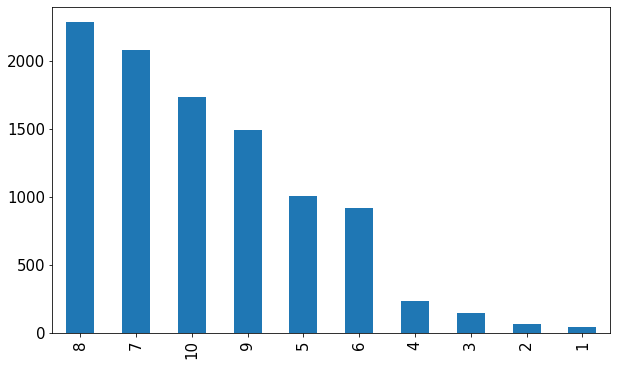

In [101]:
plt.figure(figsize=(10,6))
book1["Book_Rating"].value_counts().plot(kind="bar")

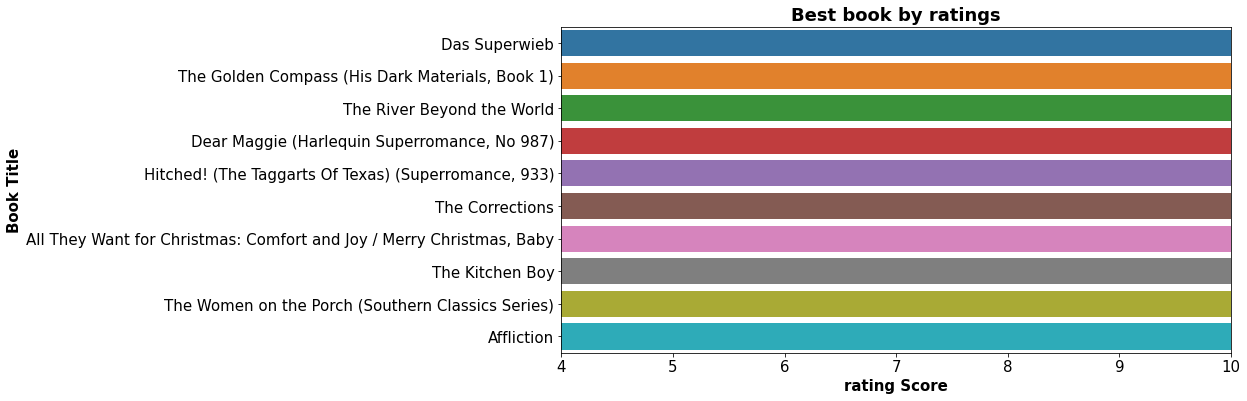

In [102]:
book_sorted_ranking=book_sorted_ranking.sort_values('Book_Rating',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=book_sorted_ranking['Book_Rating'].head(10), y=book_sorted_ranking['Book_Title'].head(10), data=book_sorted_ranking)
plt.xlim(4, 10)
plt.title('Best book by ratings', weight='bold')
plt.xlabel('rating Score', weight='bold')
plt.ylabel('Book Title', weight='bold')
plt.savefig('best_book.png')

In [103]:
#number of unique users in the dataset
len(book1.User_ID.unique())

2182

In [104]:
book1.Book_Title.unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [105]:
book1.columns

Index(['User_ID', 'Book_Title', 'Book_Rating'], dtype='object')

In [106]:
book1.sort_values('User_ID')

,User_ID,Book_Title,Book_Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [107]:
book1.duplicated('Book_Rating')

0       False
1       False
2       False
3       False
4        True
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Length: 10000, dtype: bool

In [108]:
book1['Book_Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

In [109]:
book_df = book1.pivot_table(index='User_ID', columns='Book_Title',values='Book_Rating')

In [110]:
book_df.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#Impute those NaNs with 0 values
book_df.fillna(0, inplace=True)

In [112]:
book_df.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Recommendation Based on Cosine Similarity

In [113]:
# Calculating Cosine similarities between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [114]:
book_sim = 1-pairwise_distances(book_df.values,metric='cosine')

In [115]:
book_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [116]:
#Store the results in a dataframe
book_sim_df = pd.DataFrame(book_sim)

In [117]:
#Set the index and column names to user ids
book_sim_df.index = book1.User_ID.unique()
book_sim_df.columns = book1.User_ID.unique()

In [118]:
book_sim_df.iloc[0:7,0:7]

,276726,276729,276736,276737,276744,276745,276747
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
np.fill_diagonal(book_sim,0)
book_sim_df.iloc[0:7,0:7]

,276726,276729,276736,276737,276744,276745,276747
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# Most similar Users
book_sim_df.idxmax(axis=1)[0:7]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
dtype: int64

## Recommendation Based on Correlation

In [121]:
#Correlation score
corr=1-pairwise_distances(book_df.values, metric='correlation') #Correlation similarity score
corr.shape
corr_df=pd.DataFrame(corr)

In [122]:
corr_df.index=book1['User_ID'].unique()
corr_df.columns=book1['User_ID'].unique()

In [123]:
corr_df.iloc[0:7,0:7]

,276726,276729,276736,276737,276744,276745,276747
276726,1.000000,-0.000272,-0.000272,-0.000272,-0.000469,-0.000272,-0.000523
276729,-0.000272,1.000000,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199
276736,-0.000272,-0.000104,1.000000,-0.000104,-0.000179,-0.000104,-0.000199
276737,-0.000272,-0.000104,-0.000104,1.000000,-0.000179,-0.000104,-0.000199
276744,-0.000469,-0.000179,-0.000179,-0.000179,1.000000,-0.000179,-0.000344
276745,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,1.000000,-0.000199
276747,-0.000523,-0.000199,-0.000199,-0.000199,-0.000344,-0.000199,1.000000


In [124]:
corr_df.max()
corr_df.idxmax(axis=1)[0:5]

276726    276726
276729    276729
276736    276736
276737    276737
276744    276744
dtype: int64

   # Ratings are highly imbalanced and their is no Correlation Between Books. 
   # It is not possible Recommend with given dataset.
   # Most of the users not given the Ratings and whoever Given, they gave rating to particular books only.